In [1]:
from eigen_rootfinding.utils import condeigs
from eigen_rootfinding.polyroots import solve
from eigen_rootfinding.Multiplication import *
import eigen_rootfinding as er
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
from matplotlib import ticker as mticker
from tests.devastating_example_test_scripts import *
from tests.conditioning_ratios import *
from scipy.stats import linregress
from scipy.spatial.distance import pdist
%load_ext autoreload
%autoreload 2

# Arbitrary precision tests are very slow, so I'm just running the high multiplicity root tests on this branch. All the code here is loading in data from tests run on the server

# Generate Random Systems with known roots

Goal: Find $n$ hyperellipses that have common roots at  chosen points $\mathbf {r_1,\ldots,r_n}$. 

Let's just take this one hyperellipse at a time.

Pick a chosen center $\mathbf c$ of the hyperellipse.

Then the equation for the hyperellipse is

$$f(\mathbf x) = \sum_{j=1}^n \frac{(x_j - c_j)^2}{a_{j}^2} - 1$$

and it has a root at $\mathbf r_i$ iff

$$\sum_{j=1}^n \frac{(r_{ij} - c_j)^2}{a_{j}^2} = 1$$

Good news! This is just a linear system in $1/a_i^2$!

$$\begin{bmatrix}
(r_{11} - c_1)^2       &   (r_{11} - c_2)^2       & \dots     &   (r_{1n} - c_n)^2       \\
(r_{21} - c_1)^2       &   (r_{21} - c_2)^2       & \dots     &   (r_{2n} - c_n)^2       \\
\vdots  &  \vdots   &   \vdots  &   \vdots  \\   
(r_{n1} - c_1)^2       &   (r_{n1} - c_2)^2       & \dots     &   (r_{nn} - c_n)^2       \\
\end{bmatrix}
\begin{bmatrix}
1/a_1^2    \\
1/a_2^2     \\
\vdots  \\
1/a_n^2     \\
\end{bmatrix}=
\mathbb 1$$

If you get a solution that has some negative outputs for $1/a_i^2$, then you've got some sort of cross between a hyperellipse and a hyperhyperbola.

For convenience, we're just going to use $1/a_i^2$ for our coefficients and not actually convert to $a_i$. In the code, I've denoted the $\mathbf a$ vector as `scalar`.

If we repeat this process $n$ times, we end up with $n$ hyper-conics that have common roots at $\mathbf {r_1,\ldots,r_n}$.

In [2]:
np.random.seed(0)
dim = 2
roots = np.random.randn(dim,dim)
centers = np.random.randn(dim,dim)
print('Chosen Roots:',*roots)
print('Chosen Centers:',*centers)

Chosen Roots: [1.76405235 0.40015721] [0.97873798 2.2408932 ]
Chosen Centers: [ 1.86755799 -0.97727788] [ 0.95008842 -0.15135721]


In [3]:
mp.matrix([[coord for coord in root] for root in roots])

matrix(
[['1.76405234596766', '0.400157208367223'],
 ['0.978737984105739', '2.24089319920146']])

In [4]:
scalars = [get_scalar(c,roots) for c in centers]
print('Scalars:',*scalars)

Scalars: [-6.09487717  0.56147239] [1.42922176 0.17453276]


In [5]:
polys = [get_MultiPower(c,roots) for c in centers]
print('Coefficients of Polynomials:',*[p.coeff for p in polys],sep='\n')

Coefficients of Polynomials:
[[-21.72130051   1.0974291    0.56147239]
 [ 22.76507313   0.           0.        ]
 [ -6.09487717   0.           0.        ]]
[[ 0.29411112  0.05283358  0.17453276]
 [-2.71577408  0.          0.        ]
 [ 1.42922176  0.          0.        ]]


In [6]:
roots, polys = gen_almost_high_multiplicity_root(3,3,.0001,123,True)

Centers:
[[-1.0856306   0.99734545  0.2829785 ]
 [-1.50629471 -0.57860025  1.65143654]
 [-2.42667924 -0.42891263  1.26593626]]
Primary Root:
[[-0.8667404  -0.67888615 -0.09470897]]
Perturbation Directions:
[[ 1.49138963e-04 -6.38901997e-05 -4.43981960e-05]
 [-4.34351276e-05  2.20593008e-04  2.18678609e-04]]
2 Nearby Root(s):
[[-0.86659126 -0.67895004 -0.09475337]
 [-0.86678384 -0.67866556 -0.09449029]]
0 Other Fixed Root(s):
[]
All Fixed Roots:
[[-0.8667404  -0.67888615 -0.09470897]
 [-0.86659126 -0.67895004 -0.09475337]
 [-0.86678384 -0.67866556 -0.09449029]]


In [7]:
np.array(mp.chop(er.solve(polys)).tolist(),dtype='complex')

array([[-1.13690694-4.11421669e+00j, -0.63221006+7.14549368e-01j,
         2.30067894-1.57407180e-01j],
       [-1.13690694+4.11421669e+00j, -0.63221006-7.14549368e-01j,
         2.30067894+1.57407180e-01j],
       [ 1.36339452-4.11297767e+00j, -0.29106916-7.14334157e-01j,
         2.29995759+1.29824794e+00j],
       [ 1.36339452+4.11297767e+00j, -0.29106916+7.14334157e-01j,
         2.29995759-1.29824794e+00j],
       [-0.86659132+2.25322047e-09j, -0.67895004+7.60163526e-10j,
        -0.09475338-5.62869789e-10j],
       [-0.86674032-3.65918917e-09j, -0.67888616-1.23200303e-09j,
        -0.09470895+9.14927537e-10j],
       [-0.86675198-8.45736612e-09j, -0.67864692-3.09527929e-09j,
        -0.09446682+2.19071758e-09j],
       [-0.86678408+9.86333482e-09j, -0.67866553+3.56711826e-09j,
        -0.09449036-2.54277534e-09j]])

# Generate Random Systems that Almost have Multiple Roots

### roots of multiplicity dim

In [8]:
alphas = np.array([1.00000000e-06, 1.26485522e-06, 1.59985872e-06,
         2.02358965e-06, 2.55954792e-06, 3.23745754e-06,
         4.09491506e-06, 5.17947468e-06, 6.55128557e-06,
         8.28642773e-06, 1.04811313e-05, 1.32571137e-05,
         1.67683294e-05, 2.12095089e-05, 2.68269580e-05,
         3.39322177e-05, 4.29193426e-05, 5.42867544e-05,
         6.86648845e-05, 8.68511374e-05, 1.09854114e-04,
         1.38949549e-04, 1.75751062e-04, 2.22299648e-04,
         2.81176870e-04, 3.55648031e-04, 4.49843267e-04,
         5.68986603e-04, 7.19685673e-04, 9.10298178e-04,
         1.15139540e-03, 1.45634848e-03, 1.84206997e-03,
         2.32995181e-03, 2.94705170e-03, 3.72759372e-03,
         4.71486636e-03, 5.96362332e-03, 7.54312006e-03,
         9.54095476e-03, 1.20679264e-02, 1.52641797e-02,
         1.93069773e-02, 2.44205309e-02, 3.08884360e-02,
         3.90693994e-02, 4.94171336e-02, 6.25055193e-02,
         7.90604321e-02, 1.00000000e-01, 1e-5,
         1e-4, 1e-3, 1e-2])
alphasrt = np.argsort(alphas)

In [9]:
folder = 'tests/conditioning_ratios/nearby_roots/mult/'
condratios = []
eigenconds = []
rootconds = []
testsperdim = 100
digitsprecision = 100
for alpha in alphas:
    alphastr = str(alpha).replace('.','_')
    filename = 'alpha'+alphastr+f'_{testsperdim}testsperdim_{digitsprecision}digitsprecision'
    fileend = '.npy'
    condratios.append(np.load(folder+filename+fileend,allow_pickle=True).item())
    eigenconds.append(np.load(folder+filename+'_eigconds'+fileend,allow_pickle=True).item())
    rootconds.append(np.load(folder+filename+'_rootconds'+fileend,allow_pickle=True).item())
condratios,eigenconds,rootconds = np.array(condratios),np.array(eigenconds),np.array(rootconds)

In [10]:
def get_slope(dataset):
    dataset_log10 = [np.log10(dataset[d].flatten()) for d in dataset.keys()]
    dataset_log10_aspoints = np.array([[d,val] for i,d in enumerate(dataset.keys()) 
                                       for val in dataset_log10[i]])
    return linregress(dataset_log10_aspoints)[0]

In [11]:
change_dim_cratio_slopes_mult = np.array([get_slope(cratio) for cratio in condratios])
change_dim_eigc_slopes_mult = np.array([get_slope(eigc) for eigc in eigenconds])
change_dim_rootc_slopes_mult = np.array([get_slope(rootc) for rootc in rootconds])

In [12]:
np.save('tests/conditioning_ratios/alphas',alphas)
np.save('tests/conditioning_ratios/change_dim_mult_cratios',change_dim_cratio_slopes_mult)
np.save('tests/conditioning_ratios/change_dim_mult_eigc',change_dim_eigc_slopes_mult)
np.save('tests/conditioning_ratios/change_dim_mult_rootc',change_dim_rootc_slopes_mult)

In [13]:
alphas_for_plot = [1e-6,1e-4,1e-2]
alphas_for_plot_idx = np.array([np.where(alpha == alphas)[0].item() for alpha in alphas_for_plot])

$\alpha=10^{-6}$
Slope: 5.518879678133241 
Intercept: -10.937176289698735 
Exponential Growth Rate: 330277.02439183556

$\alpha=10^{-4}$
Slope: 3.525907358357858 
Intercept: -6.941187183584294 
Exponential Growth Rate: 3355.6600392313385

$\alpha=10^{-2}$
Slope: 1.571553159218953 
Intercept: -3.0516516238587035 
Exponential Growth Rate: 36.286632233934654

$\alpha=10^{-6}$
Slope: 5.518879678133241 
Intercept: -10.937176289698735 
Exponential Growth Rate: 330277.02439183556

$\alpha=10^{-4}$
Slope: 3.525907358357858 
Intercept: -6.941187183584294 
Exponential Growth Rate: 3355.6600392313385

$\alpha=10^{-2}$
Slope: 1.571553159218953 
Intercept: -3.0516516238587035 
Exponential Growth Rate: 36.286632233934654



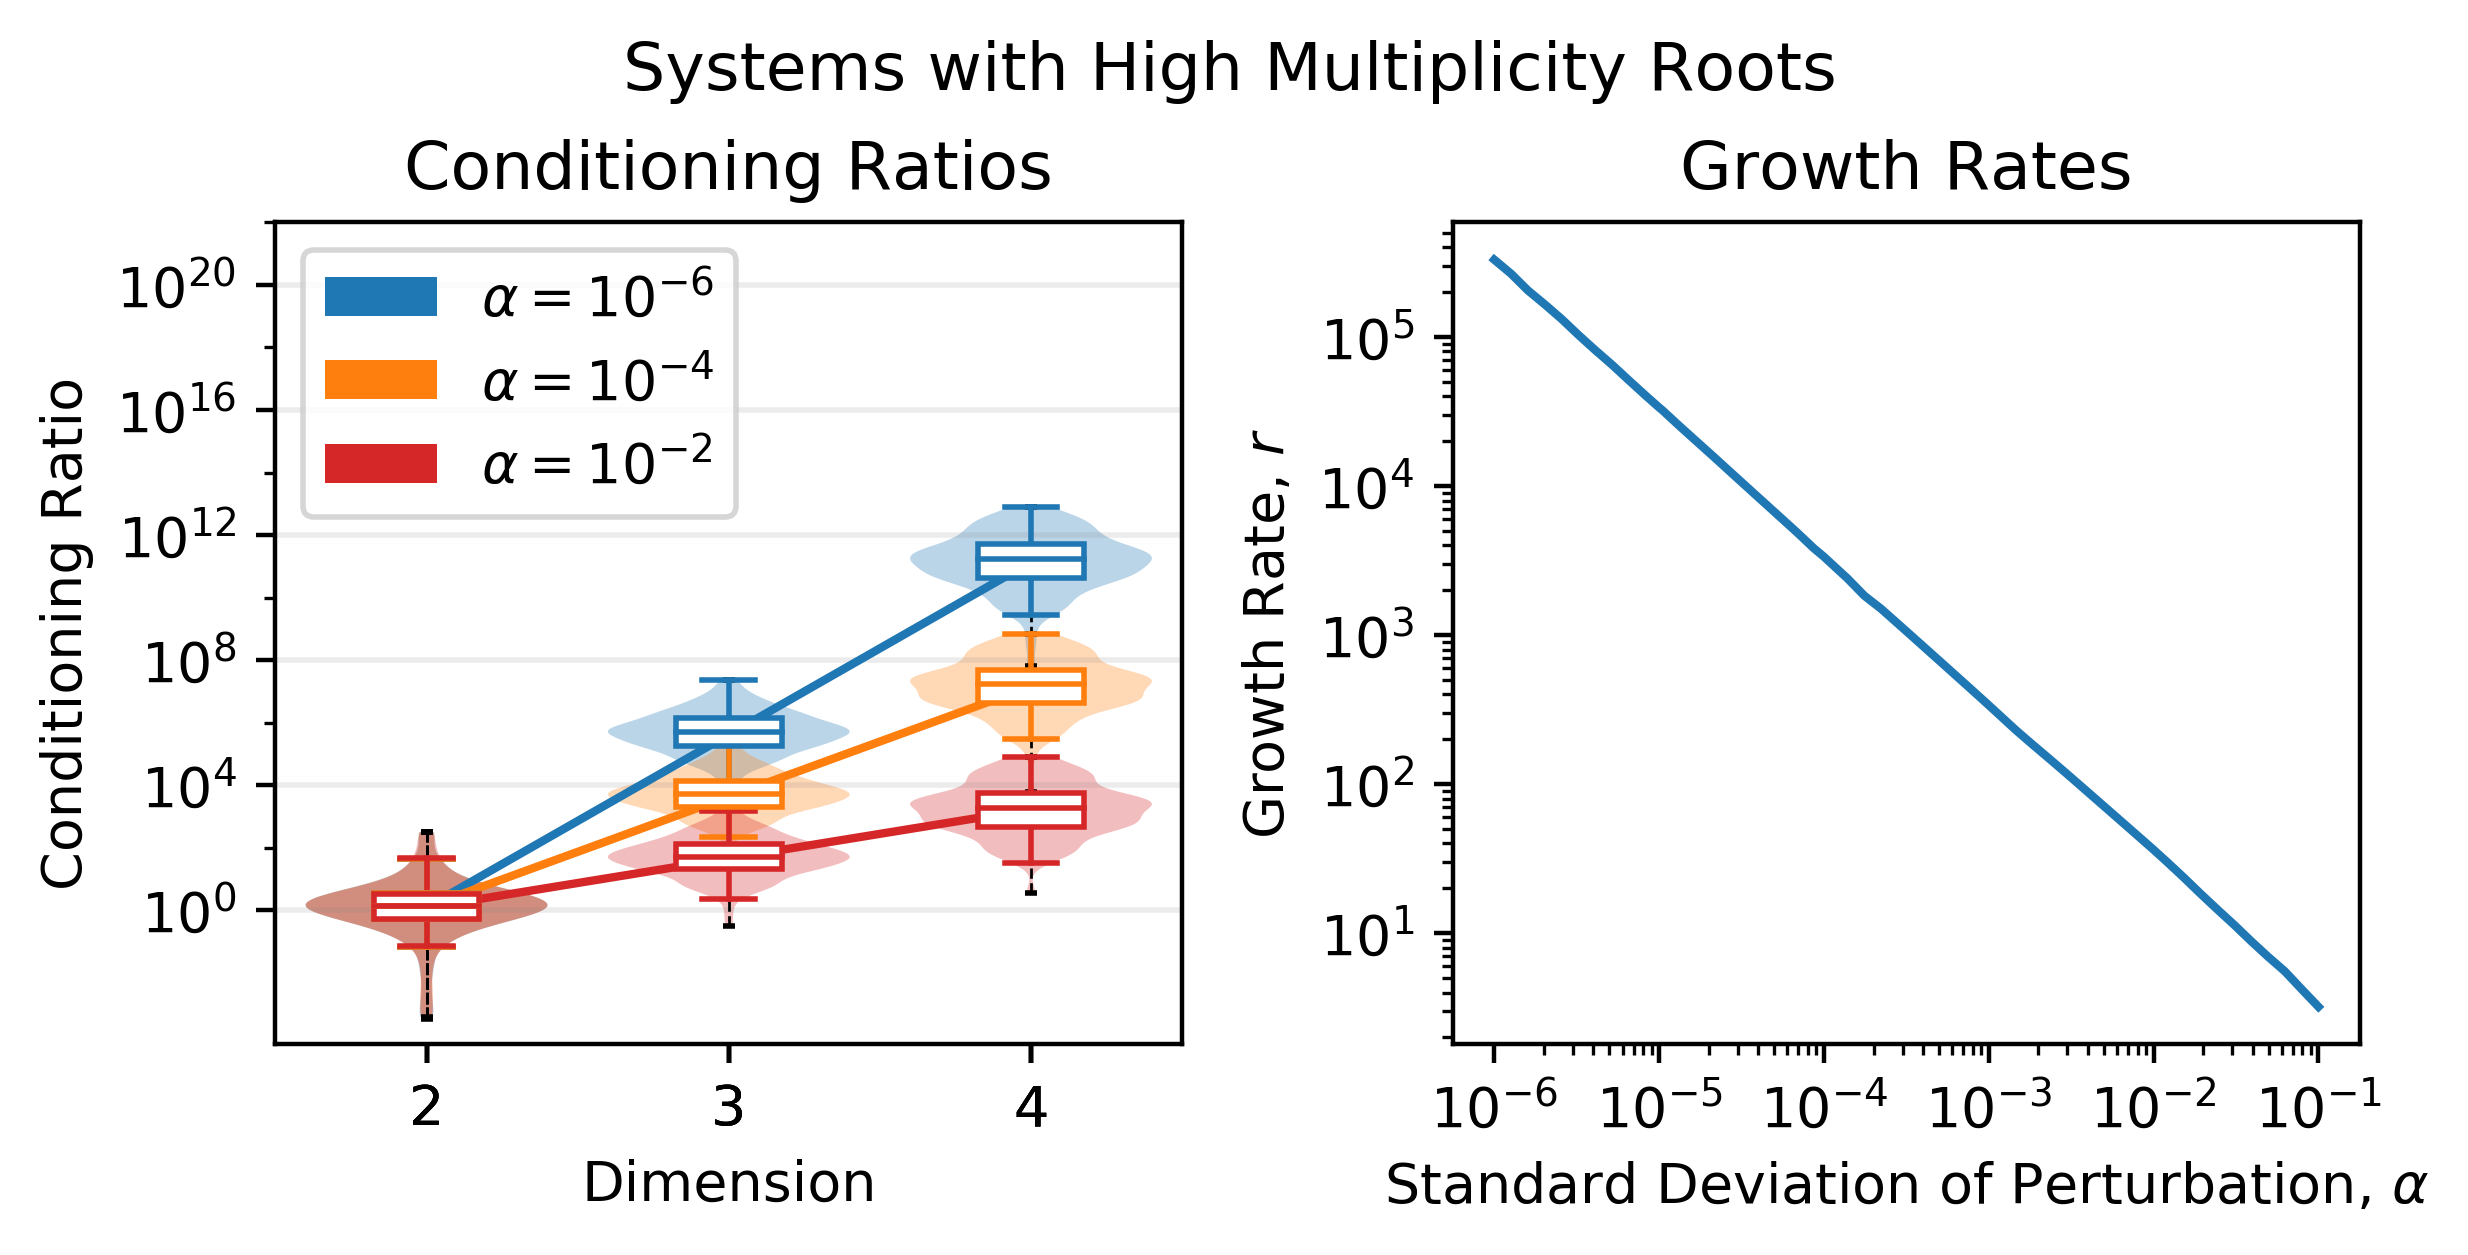

In [14]:
plot([condratios[alphas_for_plot_idx],condratios[alphas_for_plot_idx]],
     [[r'$\alpha=10^{-6}$',
      r'$\alpha=10^{-4}$',
      r'$\alpha=10^{-2}$'],
      [r'$\alpha=10^{-6}$',
      r'$\alpha=10^{-4}$',
      r'$\alpha=10^{-2}$']],
     figsize=(6.25,3.25), filename='high_multiplicities_with_growth_rates', 
     title=['Conditioning Ratios','Growth Rates',r'Systems with High Multiplicity Roots'],
     subplots=[1,2], 
     _2nd_plot=[alphas[alphasrt],10**np.array(change_dim_cratio_slopes_mult[alphasrt])-1],
     min_ylim=0,max_ylim=9,
    _2nd_plot_axis_labels=[r'Standard Deviation of Perturbation, $\alpha$','Growth Rate, $r$'])

### double, not multiple roots

I ran this set with a smaller sample size (20 tests per dimension per alpha value instead of 100), but that was because this test is very expensive to run-- it took overnight on a server with many cores to run the tests for the previous plot. Since I didn't see any exponential growth in dimension, I decided it wasn't worth the server time. 

In [15]:
alphas = np.array([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1])

In [16]:
alphas_for_plot = [1e-6,1e-4,1e-2]
alphas_for_plot_idx = np.array([np.where(alpha == alphas)[0].item() for alpha in alphas_for_plot])

In [17]:
folder = 'tests/conditioning_ratios/nearby_roots/doub/'
condratios = []
eigenconds = []
rootconds = []
testsperdim = 20
digitsprecision = 100
for alpha in alphas:
    alphastr = str(alpha).replace('.','_')
    filename = 'alpha'+alphastr+f'_{testsperdim}testsperdim_{digitsprecision}digitsprecision'
    fileend = '.npy'
    condratios.append(np.load(folder+filename+fileend,allow_pickle=True).item())
    eigenconds.append(np.load(folder+filename+'_eigconds'+fileend,allow_pickle=True).item())
    rootconds.append(np.load(folder+filename+'_rootconds'+fileend,allow_pickle=True).item())
condratios,eigenconds,rootconds = np.array(condratios),np.array(eigenconds),np.array(rootconds)

In [18]:
change_dim_cratio_slopes_doub = np.array([get_slope(cratio) for cratio in condratios])
change_dim_eigc_slopes_doub = np.array([get_slope(eigc) for eigc in eigenconds])
change_dim_rootc_slopes_doub = np.array([get_slope(rootc) for rootc in rootconds])

In [19]:
np.save('tests/conditioning_ratios/alphas',alphas)
np.save('tests/conditioning_ratios/change_dim_doub_cratios',change_dim_cratio_slopes_doub)
np.save('tests/conditioning_ratios/change_dim_doub_eigc',change_dim_eigc_slopes_doub)
np.save('tests/conditioning_ratios/change_dim_doub_rootc',change_dim_rootc_slopes_doub)

$\alpha=10^{-6}$
Slope: -0.048569751415748076 
Intercept: 0.12346551586629509 
Exponential Growth Rate: -0.10580909432370866

$\alpha=10^{-4}$
Slope: -0.04562135874391966 
Intercept: 0.11311640367545775 
Exponential Growth Rate: -0.09971784619828827

$\alpha=10^{-2}$
Slope: -0.04536774715287747 
Intercept: 0.11380425778773595 
Exponential Growth Rate: -0.09919196185570167

$\alpha=10^{-6}$
Slope: -0.048569751415748076 
Intercept: 0.12346551586629509 
Exponential Growth Rate: -0.10580909432370866

$\alpha=10^{-4}$
Slope: -0.04562135874391966 
Intercept: 0.11311640367545775 
Exponential Growth Rate: -0.09971784619828827

$\alpha=10^{-2}$
Slope: -0.04536774715287747 
Intercept: 0.11380425778773595 
Exponential Growth Rate: -0.09919196185570167



/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/eigen_rootfinding/tests/conditioning_ratios.py:540: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[1].semilogy(_2nd_plot[0], _2nd_plot[1])


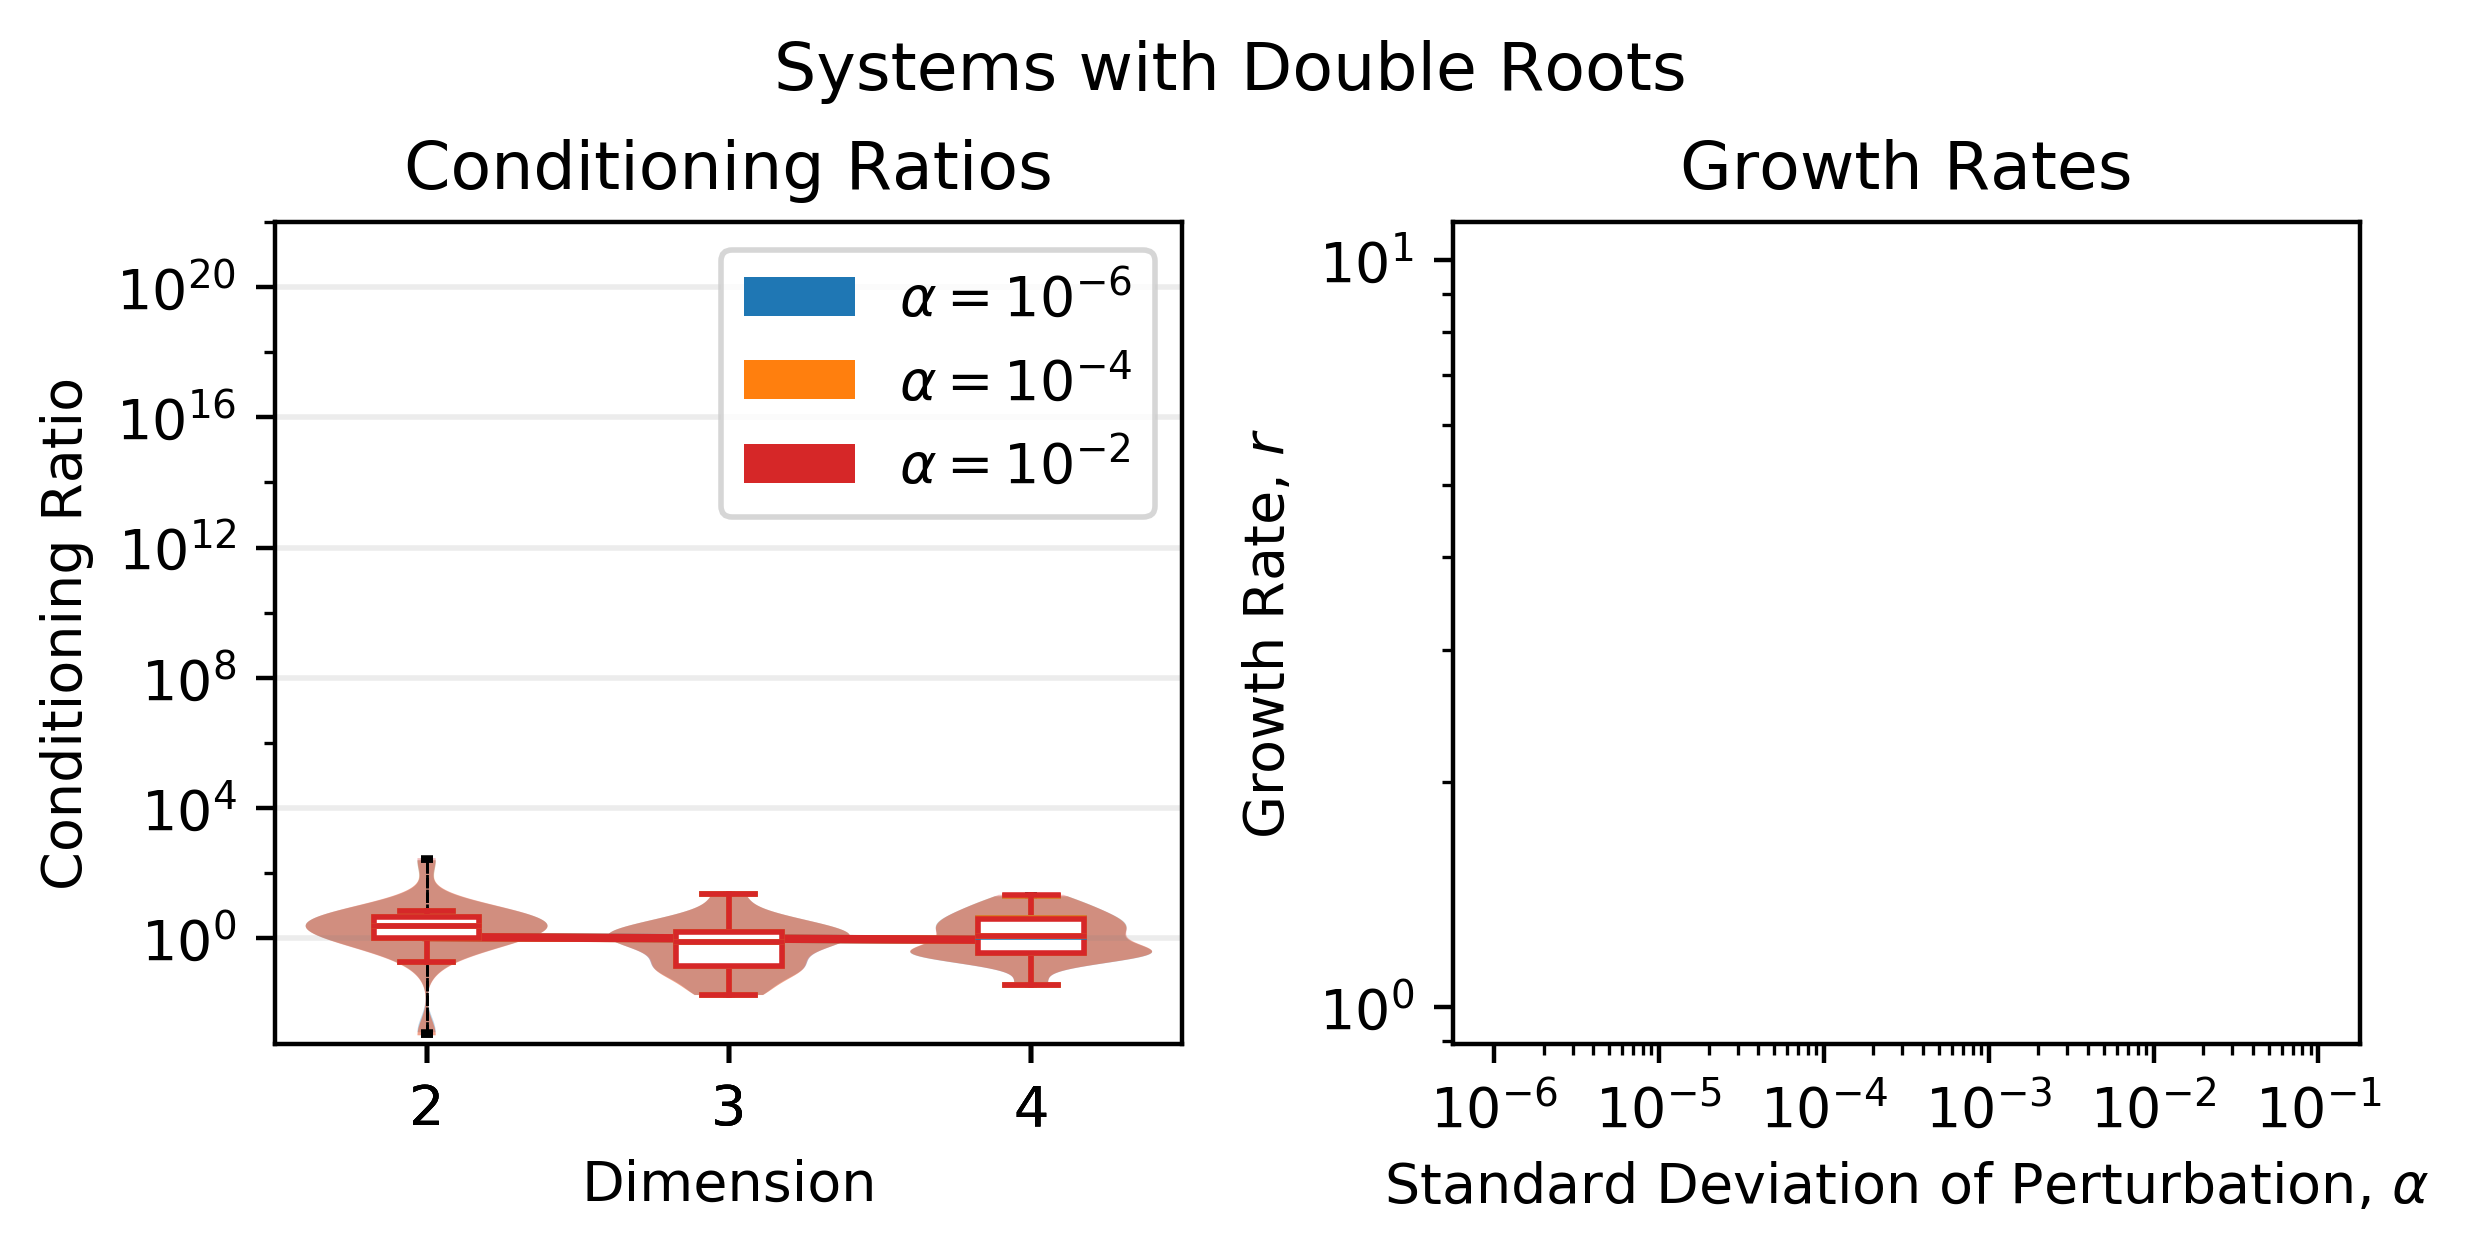

In [20]:
plot([condratios[alphas_for_plot_idx],condratios[alphas_for_plot_idx]],
     [[r'$\alpha=10^{-6}$',
      r'$\alpha=10^{-4}$',
      r'$\alpha=10^{-2}$'],
      [r'$\alpha=10^{-6}$',
      r'$\alpha=10^{-4}$',
      r'$\alpha=10^{-2}$']],
     figsize=(6.25,3.25), filename='double_roots_with_growth_rates', 
     title=['Conditioning Ratios','Growth Rates',r'Systems with Double Roots'],
     subplots=[1,2], 
     _2nd_plot=[alphas,10**np.array(change_dim_cratio_slopes_doub)-1],
     min_ylim=0,max_ylim=9,
    _2nd_plot_axis_labels=[r'Standard Deviation of Perturbation, $\alpha$','Growth Rate, $r$'])

$\alpha=10^{-6}$
Slope: 0.14598517993954338 
Intercept: 6.232685559297661 
Exponential Growth Rate: 0.39953956323949513

$\alpha=10^{-5}$
Slope: 0.14850443124312843 
Intercept: 5.223510821783568 
Exponential Growth Rate: 0.40768159130679926

$\alpha=10^{-4}$
Slope: 0.14848173735578518 
Intercept: 4.2235579390007665 
Exponential Growth Rate: 0.40760803538072343

$\alpha=10^{-3}$
Slope: 0.14817686999594176 
Intercept: 3.224292021612456 
Exponential Growth Rate: 0.4066202651551052

$\alpha=10^{-2}$
Slope: 0.1452629067600885 
Intercept: 2.23132521466238 
Exponential Growth Rate: 0.39721392976253456

$\alpha=10^{-1}$
Slope: 0.12935991343989955 
Intercept: 1.271395454089404 
Exponential Growth Rate: 0.3469761729788776

$\alpha=10^{-6}$
Slope: 0.23383563069264024 
Intercept: 5.982648901122132 
Exponential Growth Rate: 0.7133087414278618

$\alpha=10^{-5}$
Slope: 0.23355802086196742 
Intercept: 4.983352065169845 
Exponential Growth Rate: 0.7122139097290963

$\alpha=10^{-4}$
Slope: 0.23352236134

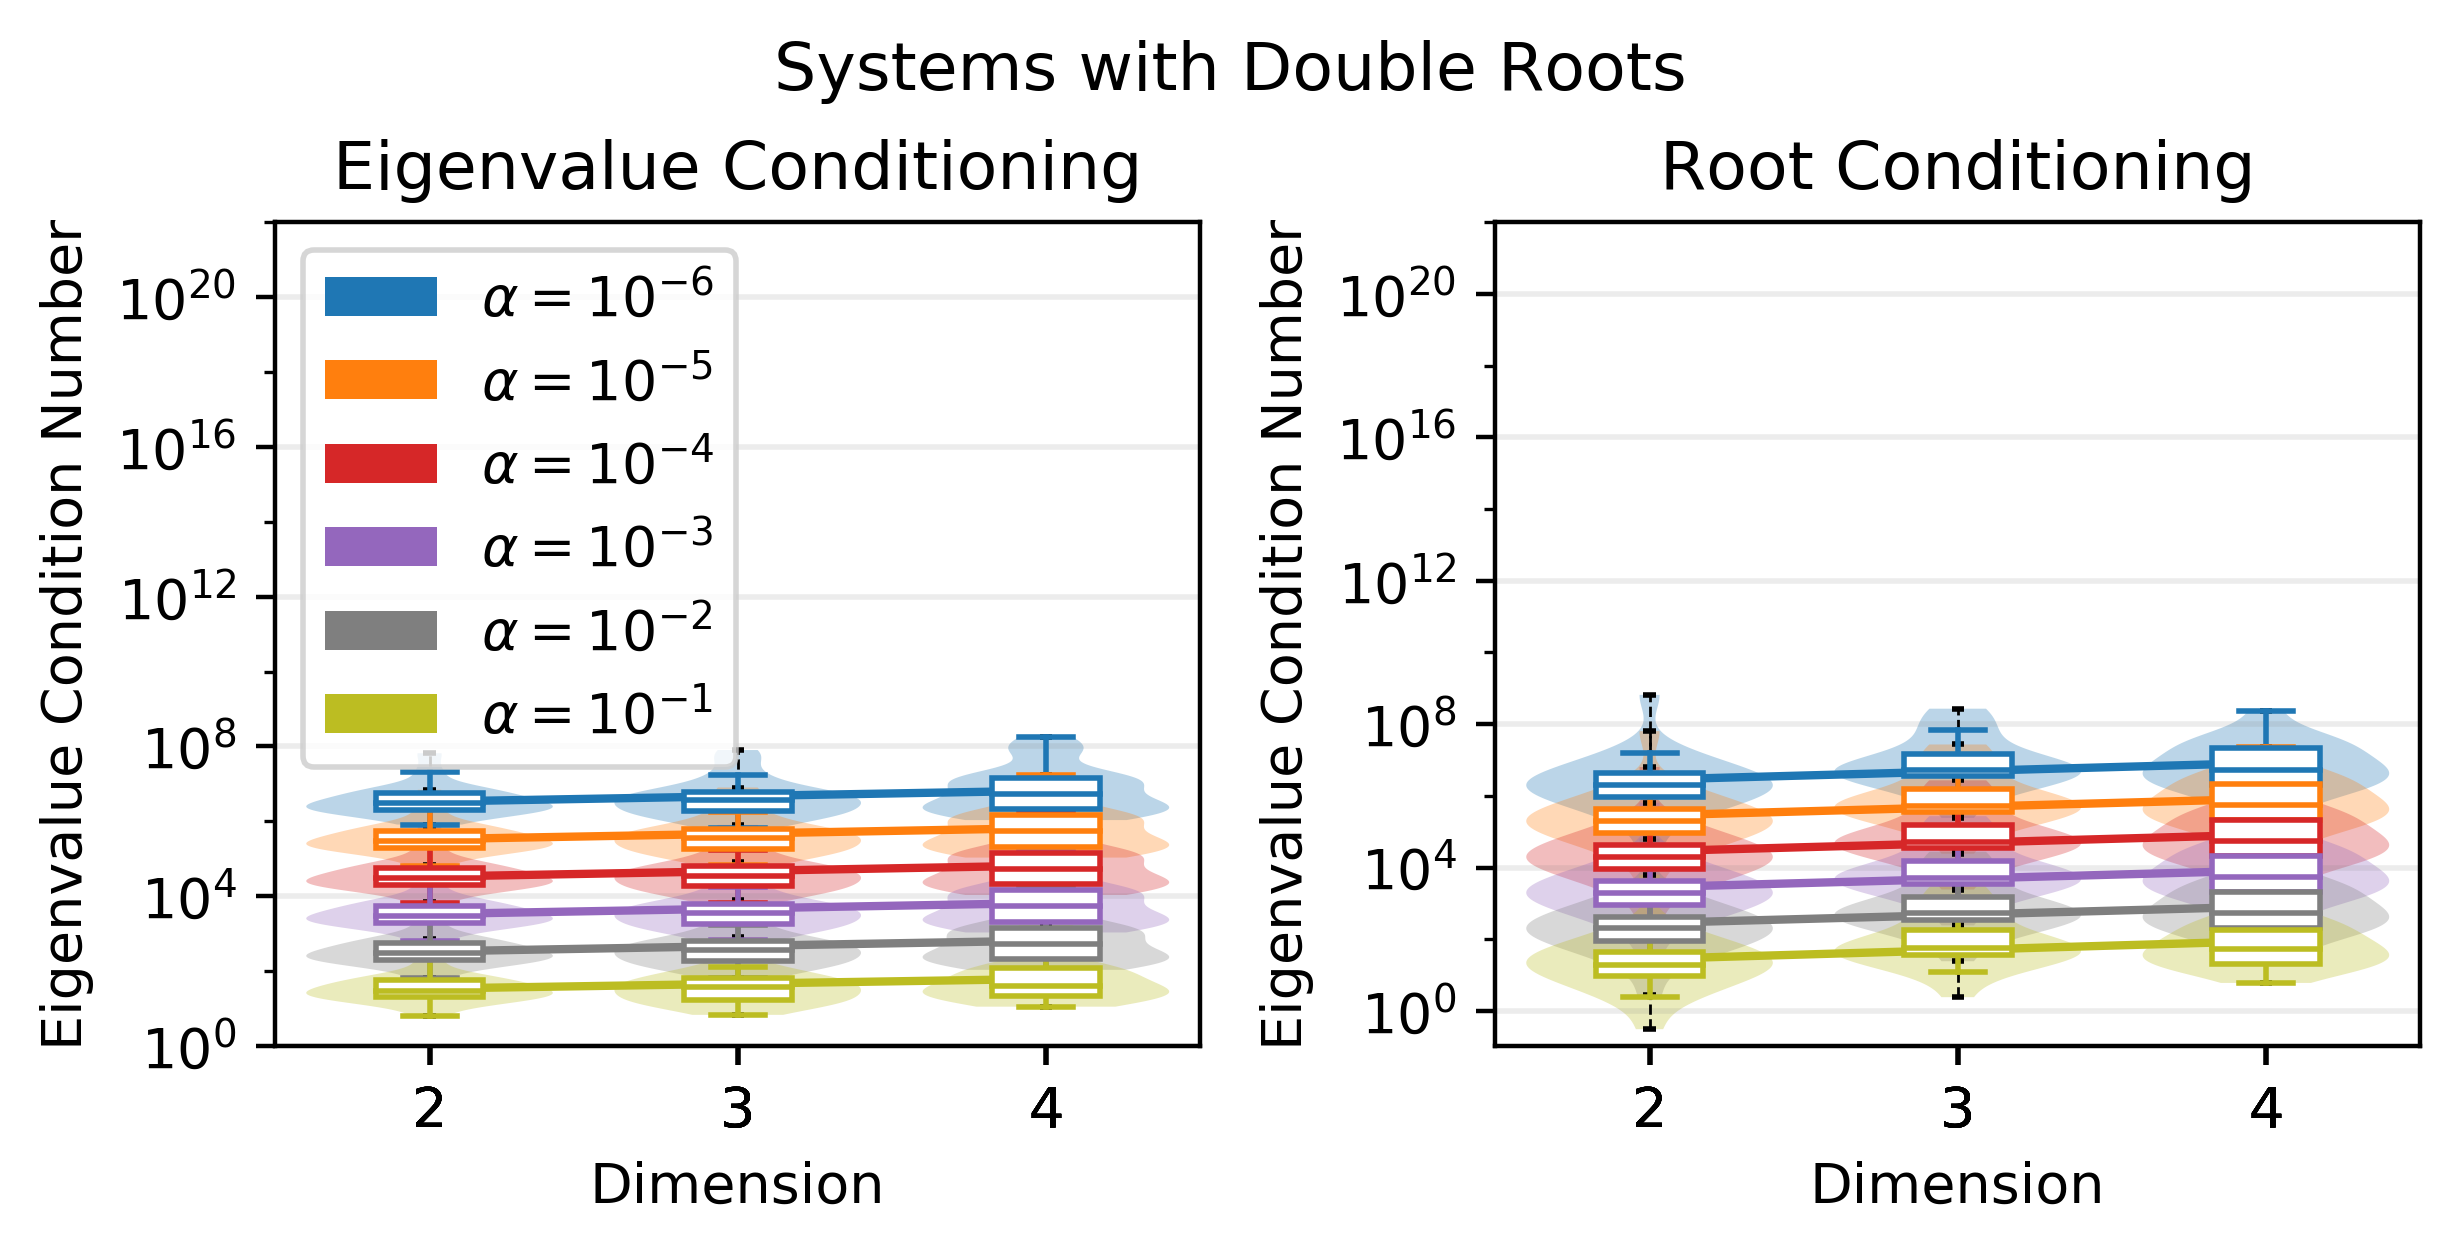

In [21]:
plot([eigenconds,rootconds],
     [[r'$\alpha=10^{-6}$',
       r'$\alpha=10^{-5}$',
       r'$\alpha=10^{-4}$',
       r'$\alpha=10^{-3}$',
       r'$\alpha=10^{-2}$',
       r'$\alpha=10^{-1}$'],
      [r'$\alpha=10^{-6}$',
       r'$\alpha=10^{-5}$',
       r'$\alpha=10^{-4}$',
       r'$\alpha=10^{-3}$',
       r'$\alpha=10^{-2}$',
       r'$\alpha=10^{-1}$']],
     figsize=(6.25,3.25), filename='double_roots_with_growth_rates', 
     title=['Eigenvalue Conditioning','Root Conditioning',r'Systems with Double Roots'],
     yaxislabel='Eigenvalue Condition Number',
     subplots=[1,2], 
     min_ylim=-1,max_ylim=9)

# What happens as you increase the multiplicity of a root in 4 dimensions (from 1 to 4)?

In [22]:
#load data and reformat it to plot
alphas = np.array([1.00000000e-06, 1.26485522e-06, 1.59985872e-06,
         2.02358965e-06, 2.55954792e-06, 3.23745754e-06,
         4.09491506e-06, 5.17947468e-06, 6.55128557e-06,
#          8.28642773e-06, 1.04811313e-05, 1.32571137e-05,
         1.67683294e-05, 2.12095089e-05, 2.68269580e-05,
         3.39322177e-05, 4.29193426e-05, 5.42867544e-05,
         6.86648845e-05, 8.68511374e-05, 1.09854114e-04,
         1.38949549e-04, 1.75751062e-04, 2.22299648e-04,
         2.81176870e-04, 3.55648031e-04, 4.49843267e-04,
         5.68986603e-04, 7.19685673e-04, 9.10298178e-04,
         1.15139540e-03, 1.45634848e-03, 1.84206997e-03,
         2.32995181e-03, 2.94705170e-03, 3.72759372e-03,
         4.71486636e-03, 5.96362332e-03, 7.54312006e-03,
         9.54095476e-03, 1.20679264e-02, 1.52641797e-02,
         1.93069773e-02, 2.44205309e-02, 3.08884360e-02,
         3.90693994e-02, 4.94171336e-02, 6.25055193e-02,
         7.90604321e-02, 1.00000000e-01, 1e-5,
         1e-4, 1e-3, 1e-2])
alphasrt = np.argsort(alphas)
path = 'figures/nearby_roots/'
condratios = []
eigenconds = []
rootconds = []
testsperdim = 100
dim = 4
digitsprecision = 100
for alpha in alphas:
    condratiosdict = {}
    eigencondsdict = {}
    rootcondsdict = {}
    for multiplicity in range(2,5):
        folder = f'multiplicity{multiplicity}/'
        alphastr = str(alpha).replace('.','_')
        filename = 'alpha'+alphastr+f'final_{testsperdim}testsperdim_{digitsprecision}digitsprecision'
        fileend = '.npy'
        condratiosdict[multiplicity] = np.load(path+folder+filename+fileend,allow_pickle=True).item()[dim]
        eigencondsdict[multiplicity] = np.load(path+folder+filename+'_eigconds'+fileend,allow_pickle=True).item()[dim]
        rootcondsdict[multiplicity] = np.load(path+folder+filename+'_rootconds'+fileend,allow_pickle=True).item()[dim]
    condratios.append(condratiosdict)
    eigenconds.append(eigencondsdict)
    rootconds.append(rootcondsdict)
condratios = np.array(condratios)
eigenconds = np.array(eigenconds)
rootconds = np.array(rootconds)

In [23]:
dim4_cratio_slopes_mult = np.array([get_slope(cratio) for cratio in condratios])
dim4_eigc_slopes_mult = np.array([get_slope(eigc) for eigc in eigenconds])
dim4_rootc_slopes_mult = np.array([get_slope(rootc) for rootc in rootconds])

In [24]:
alphas_for_plot_idx = np.array([np.where(alphas==target)[0][0] for target in [1e-6,1e-4,1e-2]])
alphas_for_plot_idx

array([ 0, 48, 50])

$\alpha=10^{-6}$
Slope: 5.930539603166047 
Intercept: -5.176699349346324 
Exponential Growth Rate: 852195.2193193978

$\alpha=10^{-4}$
Slope: 3.9452568264779866 
Intercept: -3.2066821329050406 
Exponential Growth Rate: 8814.70048403154

$\alpha=10^{-2}$
Slope: 1.9808124207497422 
Intercept: -1.2899087703314205 
Exponential Growth Rate: 94.67807319962895

$\alpha=10^{-6}$
Slope: 0.35862096647735825 
Intercept: 5.983817490154833 
Exponential Growth Rate: 1.2836049013825237

$\alpha=10^{-4}$
Slope: 0.35941074687276264 
Intercept: 3.981257007365908 
Exponential Growth Rate: 1.2877614987127521

$\alpha=10^{-2}$
Slope: 0.35416210501364437 
Intercept: 1.998958540985257 
Exponential Growth Rate: 1.2602792859607281



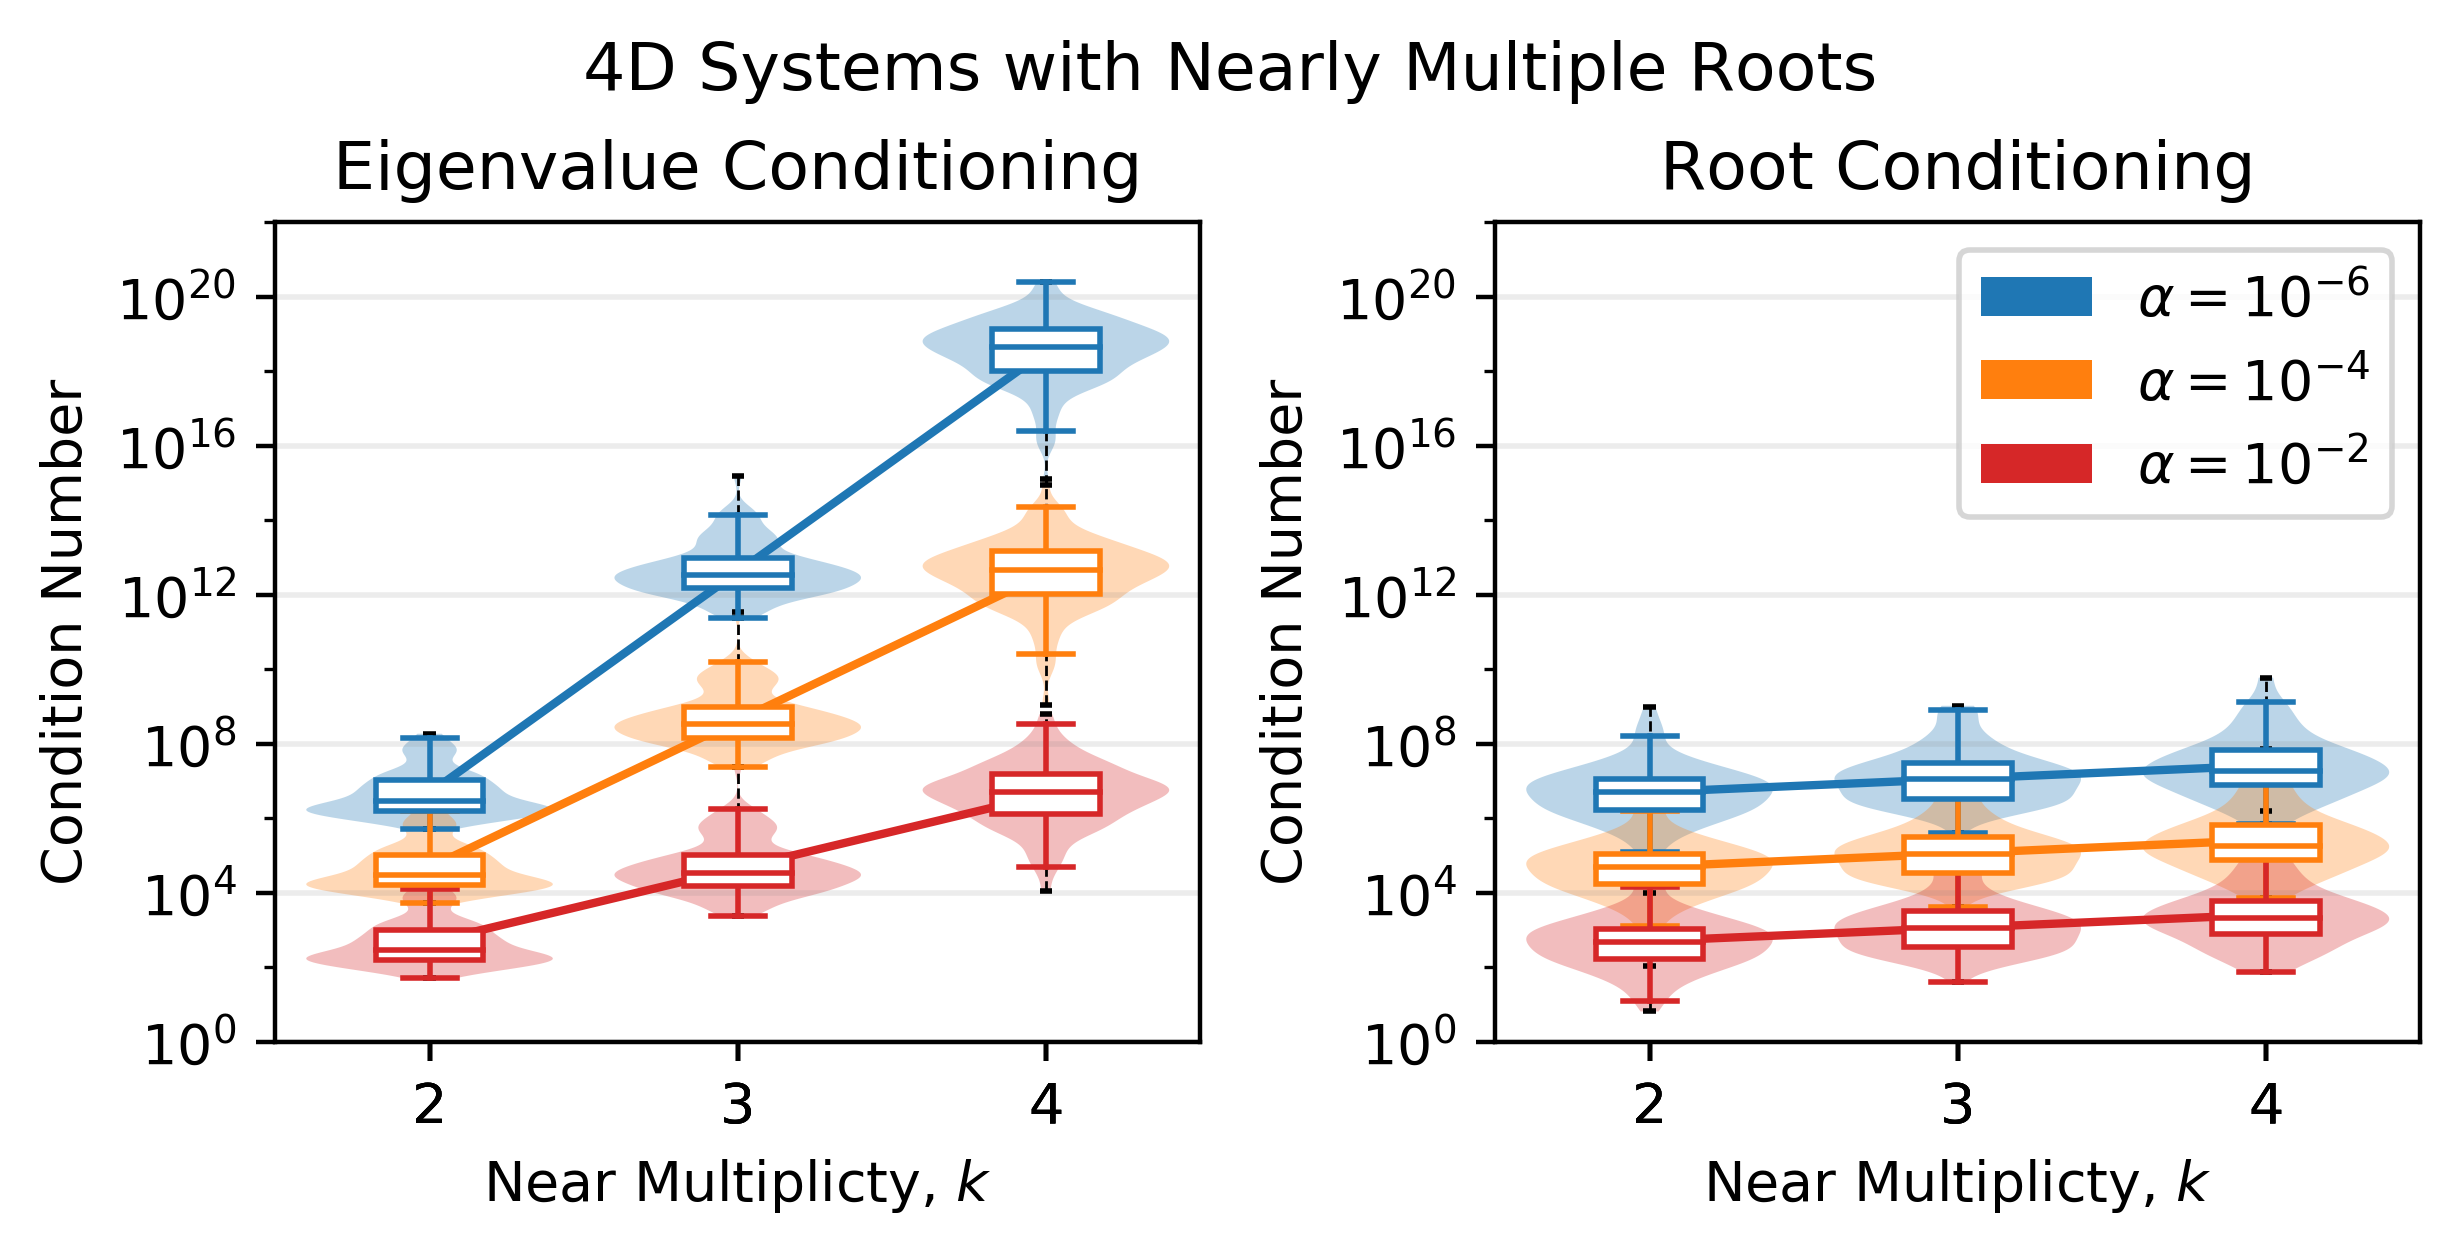

In [26]:
plot([eigenconds[alphas_for_plot_idx],rootconds[alphas_for_plot_idx]],
     [[r'$\alpha=10^{-6}$',
       r'$\alpha=10^{-4}$',
       r'$\alpha=10^{-2}$'],
      [r'$\alpha=10^{-6}$',
       r'$\alpha=10^{-4}$',
       r'$\alpha=10^{-2}$']],
     figsize=(6.25,3.25), filename='mult_eig_v_root_cond', 
     title=['Eigenvalue Conditioning','Root Conditioning',r'4D Systems with Nearly Multiple Roots'],
     yaxislabel='Condition Number',xaxislabel=r'Near Multiplicty, $k$',
     min_ylim=0, max_ylim=25,which_legend=1,major_ticks=range(0,23,4),minor_ticks=range(0,23,2),
     subplots=[1,2])

$\alpha=10^{-6}$
Slope: 5.571918636688688 
Intercept: -11.160516839501152 
Exponential Growth Rate: 373179.2374410147

$\alpha=10^{-4}$
Slope: 3.5858460796052234 
Intercept: -7.187939140270945 
Exponential Growth Rate: 3852.4176263530235

$\alpha=10^{-2}$
Slope: 1.6266503157360979 
Intercept: -3.2888673113166775 
Exponential Growth Rate: 41.330199543885634

$\alpha=10^{-6}$
Slope: 5.571918636688688 
Intercept: -11.160516839501152 
Exponential Growth Rate: 373179.2374410147

$\alpha=10^{-4}$
Slope: 3.5858460796052234 
Intercept: -7.187939140270945 
Exponential Growth Rate: 3852.4176263530235

$\alpha=10^{-2}$
Slope: 1.6266503157360979 
Intercept: -3.2888673113166775 
Exponential Growth Rate: 41.330199543885634



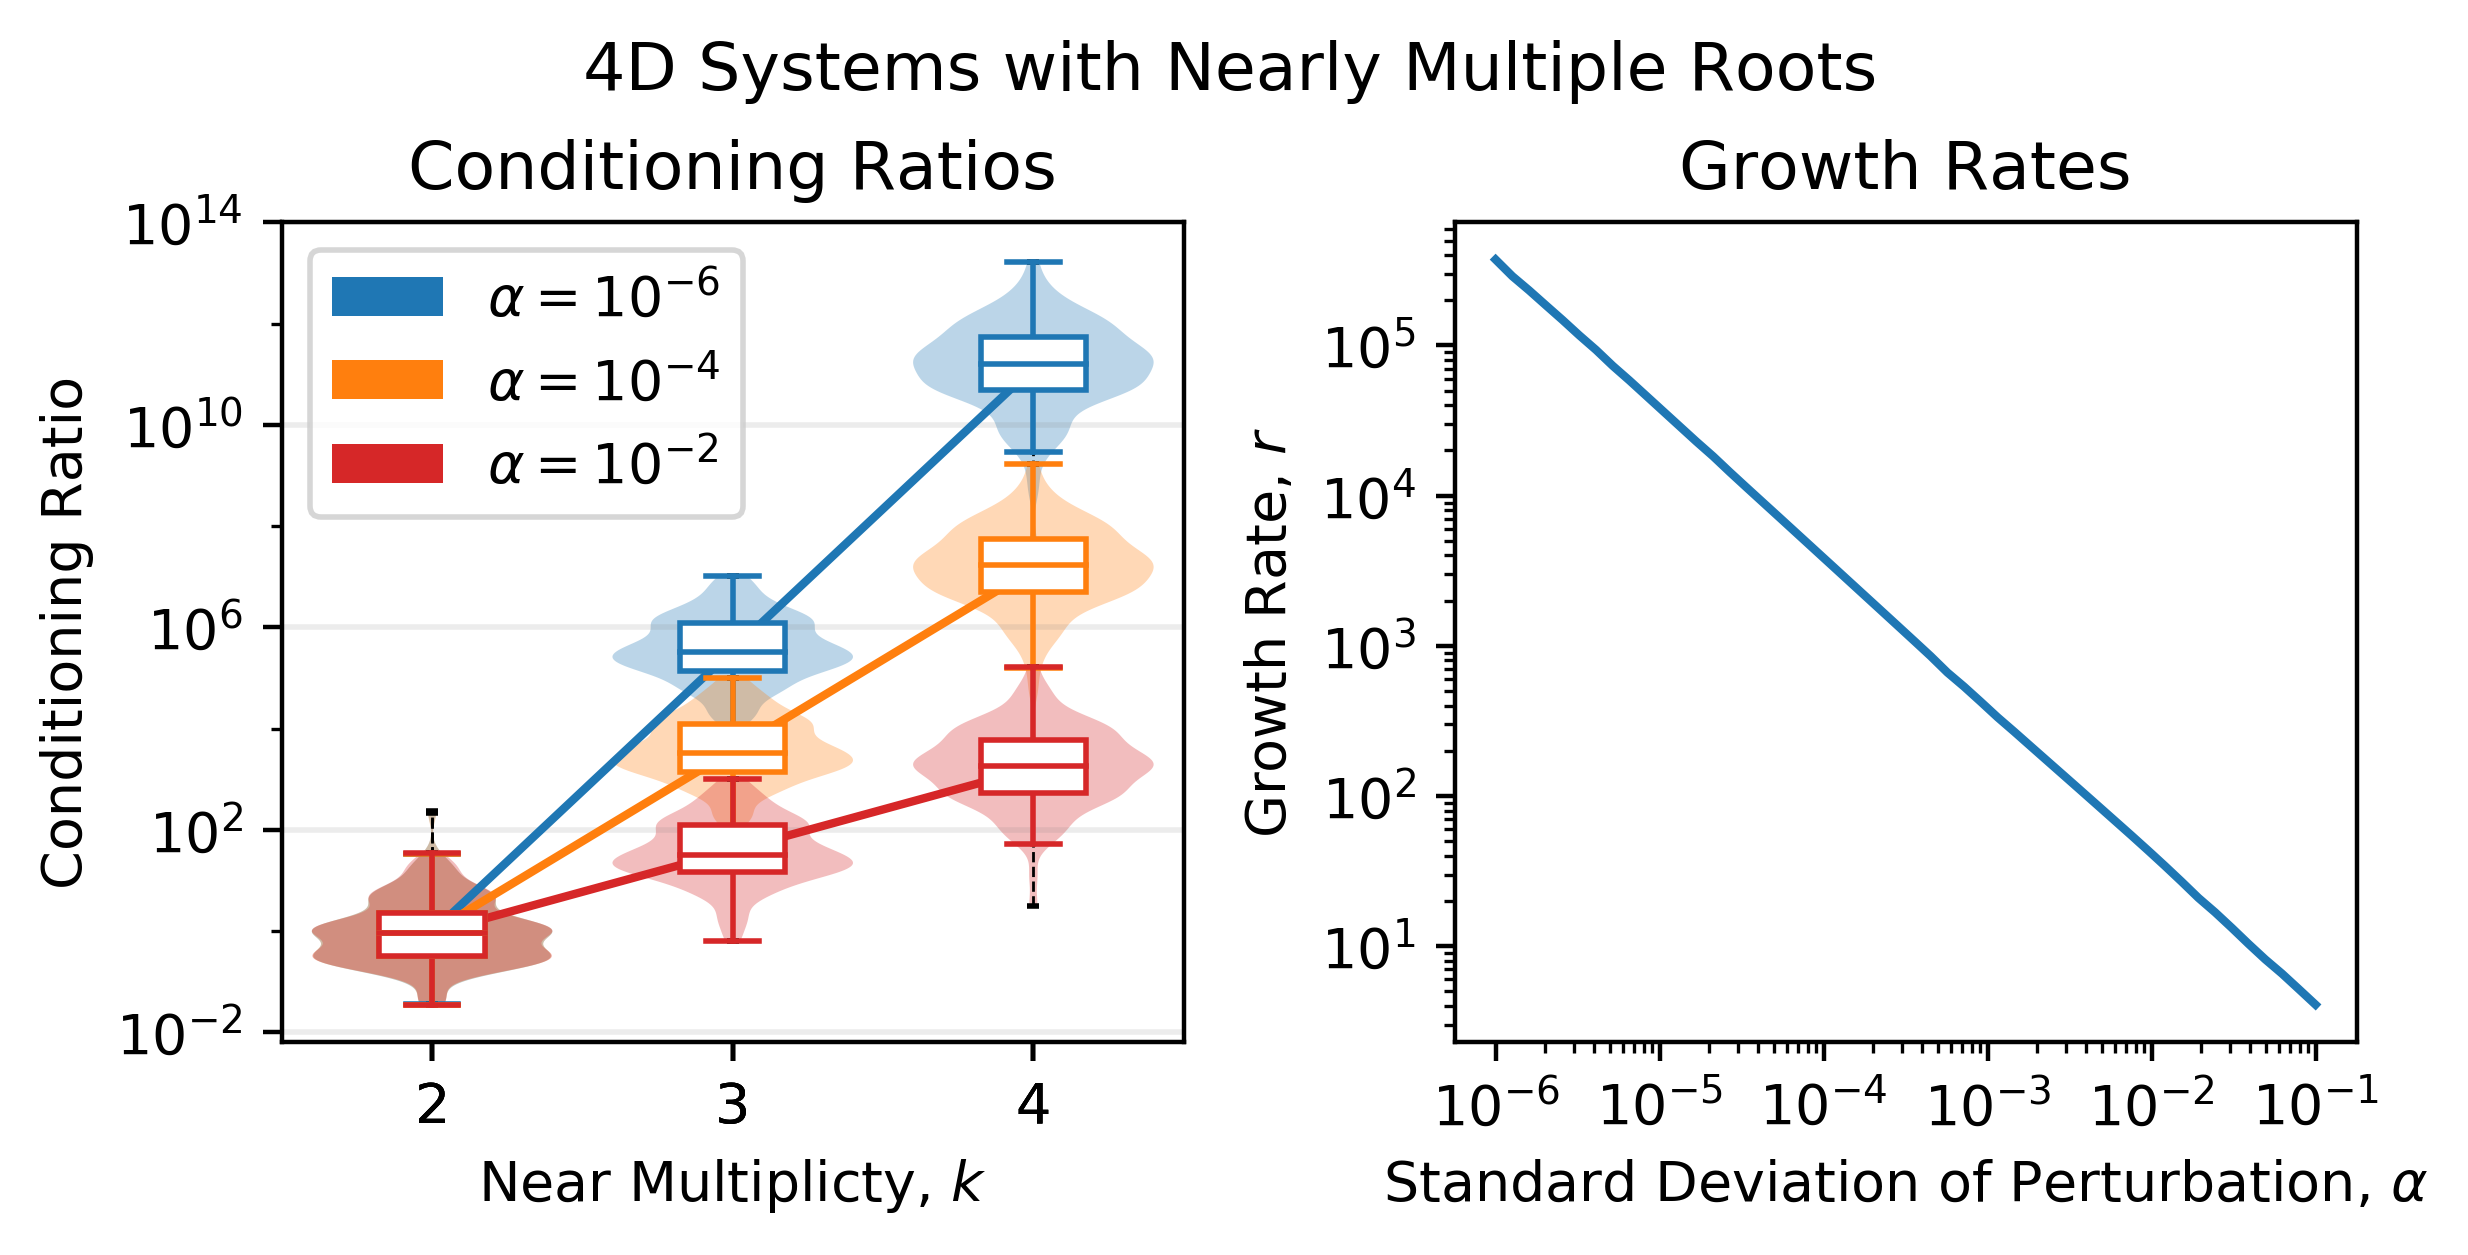

In [30]:
plot([condratios[alphas_for_plot_idx],condratios[alphas_for_plot_idx]],
     [[r'$\alpha=10^{-6}$',
      r'$\alpha=10^{-4}$',
      r'$\alpha=10^{-2}$'],
      [r'$\alpha=10^{-6}$',
      r'$\alpha=10^{-4}$',
      r'$\alpha=10^{-2}$']],
     figsize=(6.25,3.25), filename='dim4_high_multiplicities_with_growth_rates', 
     title=['Conditioning Ratios','Growth Rates',r'4D Systems with Nearly Multiple Roots'],
     subplots=[1,2], 
     xaxislabel=r'Near Multiplicty, $k$',
     _2nd_plot=[alphas[alphasrt],10**np.array(dim4_cratio_slopes_mult[alphasrt])-1],
     min_ylim=-2,max_ylim=15,major_ticks=range(-2,15,4),minor_ticks=range(-2,15,2),
    _2nd_plot_axis_labels=[r'Standard Deviation of Perturbation, $\alpha$','Growth Rate, $r$'])